# Machine Learning for Everybody

[Course Link](https://www.youtube.com/watch?v=i_LwzRVP7bg)

[MAGIC Gamma Telescope Data](https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope)

## Imports

In [30]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

## Intro to ML

### Types of learning

- Supervised learning: Labelled inputs are used to learn outputs.

- Unsupervised learning: Unlabelled inputs are used to identify patterns in data.

- Reinforcement learning: A model or agent learns in an interactive environment based on rewards and penalties.

### Types of features

- Features can be quantitative or qualitative:

**Qualitative**

- Nominal categorical data (e.g. country of origin) has no inherent order, and can undergo one-hot encoding i.e. one category value is defined as $1$ and all others as $0$.
- Ordinal categorical data (e.g. age group) has an inherent order, and can be assigned an appropriate integer value.

**Quantitative**
- Numerical valued data (discrete or continuous).

The list of features and values passed to an ML model is the **feature vector**.

### Supervised Learning

- Classification: Predict discrete classes, can be binary or multi-class.

- Regression: Predict continuous values e.g. future temperature/prices.

### Loss Functions

- Loss is the numerical metric defining the difference between a given prediction and a known 
label.

**L1 Loss**
$$ 
L1 = \sum^{n}_{i=1}|Y - \hat{Y}|
$$

- Takes the absolute value of your known label ($Y$), and subtracts the value of the predicted label ($\hat{Y}$).
- The further the prediction, the greater the loss.
- Taking the average of various L1 loss values gives you the **Mean Absolute Error**

**L2 Loss**
$$
L2 = \sum^{n}_{i=1}(Y - \hat{Y})^2
$$

- A quadratic function, so small differences have much lower relative loss than larger differences.
- Taking the average of various L2 loss values gives you the **Mean Squared Error**

**Binary Cross-Entropy Loss**
$$
BCE = \frac{1}{n}\sum^{n}_{i=1}(Y_i \cdot log\hat{Y_i} + (1 - Y_i) \cdot log(1 - \hat{Y_i}))
$$

- Loss calculation used for binary classification
- Loss decreases as performance improves

### Accuracy Metrics

- Measures the % correct labels as an indication of overall model performance.

## MAGIC Gamma Telescope

### Import data

In [15]:
# Define columns
list_cols = [
    'fLength', 'fWidth', 'fSize', 
    'fConc', 'fConc1', 'fAsym', 
    'fM3Long', 'fM3Trans', 'fAlpha', 
    'fDist', 'class'
]

# Import data
df = pd.read_csv('magic04.data', names = list_cols)

# Show data
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


### Encode data

The `class` column contains two distinct variables:

In [16]:
print(pd.unique(df['class']))

['g' 'h']


These can be easily converted into integers using an `.astype()` command, where $g = 1$ and $h = 0$

In [17]:
# Encode data
df['class'] = (df['class'] == 'g').astype(int)
# Report
print(pd.unique(df['class']))
# Show data
df.head()

[1 0]


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


### Visualise

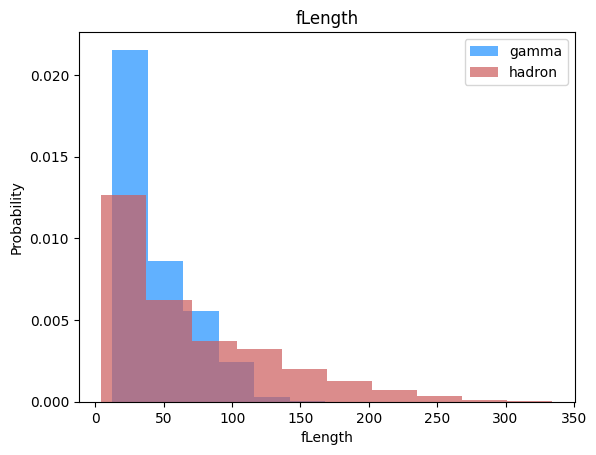

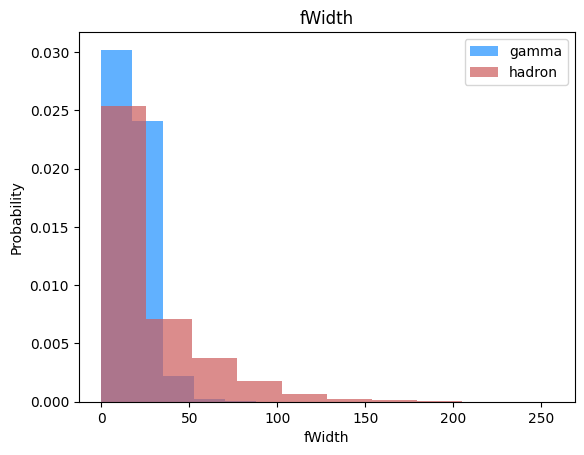

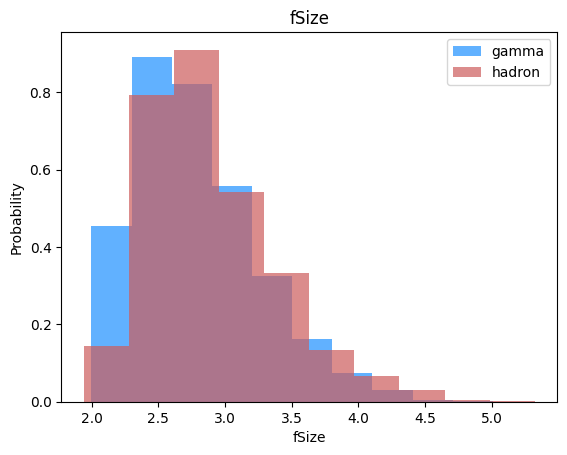

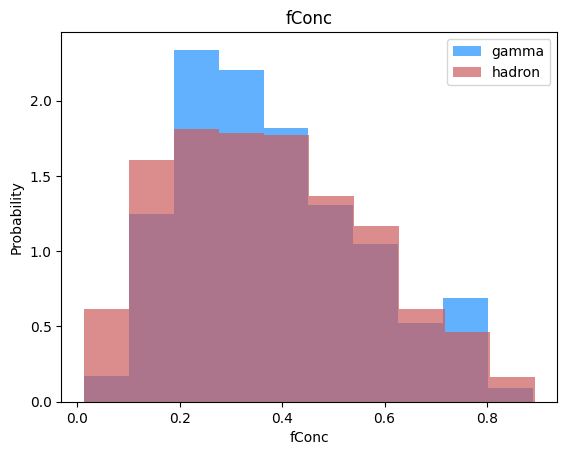

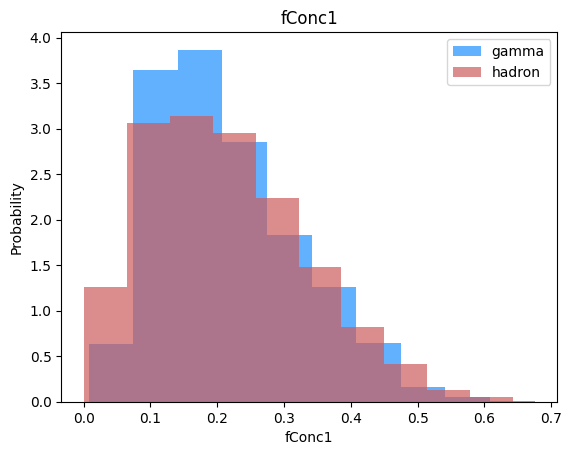

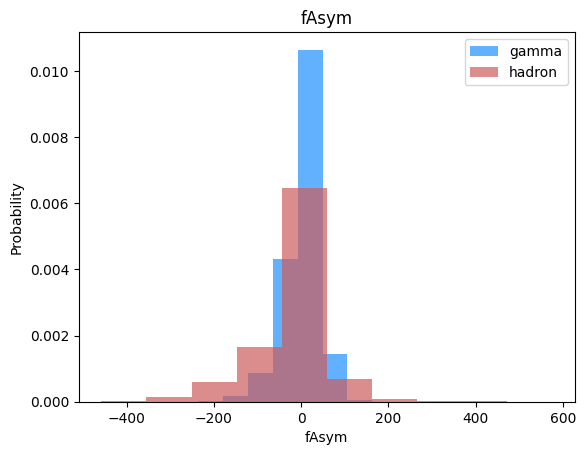

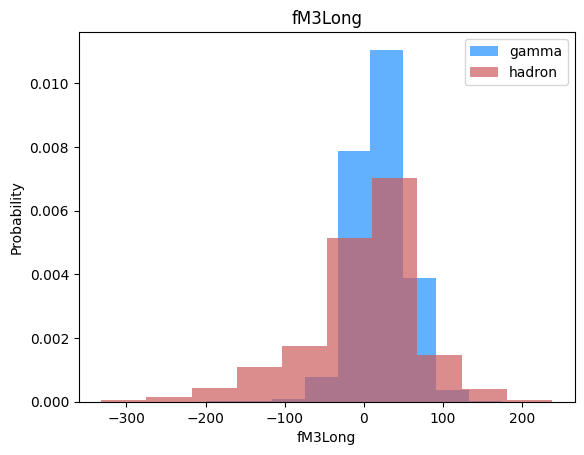

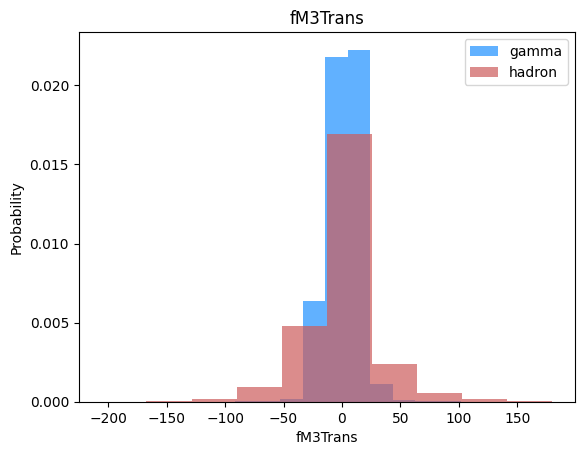

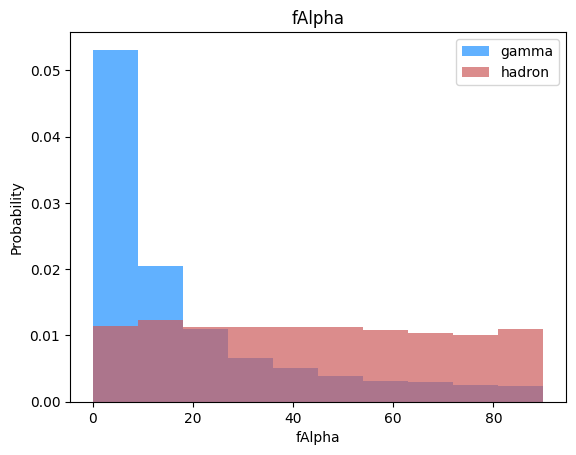

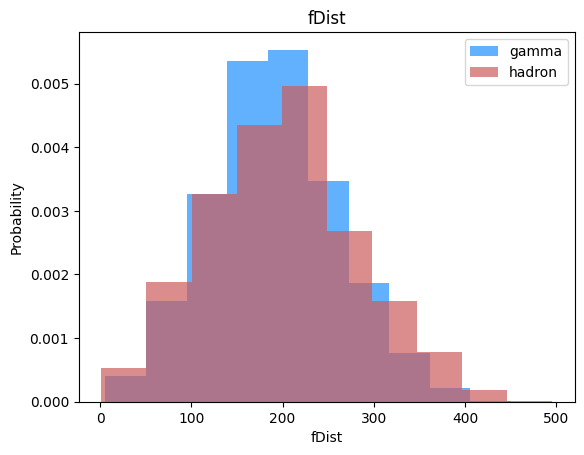

In [18]:
# Iterate through feature columns
for feature in list_cols[:-1]:
    # Set title
    plt.title(f'{feature}')
    
    # Plot data
    plt.hist(df[df['class'] == 1][feature], color = 'dodgerblue', label = 'gamma', alpha = 0.7, density = True)
    plt.hist(df[df['class'] == 0][feature], color = 'indianred', label = 'hadron', alpha = 0.7, density = True)
    # Set ylabel based on density
    plt.ylabel('Probability')
    plt.xlabel(feature)
    plt.legend()
    
    # Show plot
    plt.show()

### Split data

- Training data is used to train the model, and iterative loss is used to alter parameters.

- Validation data is passed to the model to generate iterative loss values that are NOT fed back into the model.

- Test data is used to test generalisability on previously unseen data.

Below, the `.sample()` function is used to shuffle and randomly sample data. 60% of the length of the dataframe is used for training, 20% for validation and 20% for testing.

In [19]:
# Shuffle indices of dataframe
shuffled_index = df.sample(frac = 1).index

# Define split points
train_end = int(0.6 * len(df))
valid_end = int(0.8 * len(df))

# Create splits
train = df.loc[shuffled_index[:train_end]]
valid = df.loc[shuffled_index[train_end:valid_end]]
test = df.loc[shuffled_index[valid_end:]]

### Scale data

Given that feature columns may vary in absolute numerical value, their value can be scaled to the mean/SD of the column to normalise across the dataset. This can be achieved with a custom `scale_dataset` function.

#### Oversampling

- There is a difference in the gamma/hadron labelled data in the training set:

In [20]:
print('Gamma:', len(train[train['class'] == 1]))
print('Hadron:', len(train[train['class'] == 0]))

Gamma: 7459
Hadron: 3953


It would be best to ensure that training attempts to equally sample instances of both classes. This can be achieved by adding `imblearn.over_sampling.RandomOverSampler`:

In [21]:
def scale_dataset(dataframe, oversample = False):
    # Extract all but last column (assuming label column is the final column)
    X = dataframe[dataframe.columns[:-1]].values
    # Extract label column
    Y = dataframe[dataframe.columns[-1]].values

    # Initialise sklearn StandardScaler
    scaler = StandardScaler()

    # Fit and transform X
    X = scaler.fit_transform(X)

    # Check oversample parameter
    if oversample:
        ros = RandomOverSampler()
        X, Y = ros.fit_resample(X, Y)

    # Reshape Y to 2 dimensions to be rejoined (use -1 for inferred reshaping)
    Y_reshape = np.reshape(Y, (-1, 1))

    # Rejoin X and Y data (Y must be reshaped from 1 dimension to 2 dimensional)
    data = np.hstack((X, Y_reshape))

    return data, X, Y

In [22]:
# Apply data scaling
train, X_train, Y_train = scale_dataset(train, oversample = True)

# Check number of class entries in training dataset
print('Gamma:', sum(Y_train == 1))
print('Hadron:', sum(Y_train == 0))

Gamma: 7459
Hadron: 7459


Validation and testing datasets do NOT need oversampling as they represent unseen data which will not necessarily adhere to even splits between classes.

In [23]:
# Generate validation data
valid, X_valid, Y_valid = scale_dataset(valid, oversample = False)
# Generate testing data
test, X_test, Y_test = scale_dataset(test, oversample = False)

### K-Nearest Neighbours

An datapoint is assigned an output label based on the majority label of its nearest neighbours. This requires some distance function to measure the distance between points.

In 2D space, Euclidean distance is often used:
$$
distance = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}
$$

The distance function used can be expanded into $n$ dimensions where $n$ is the number of relevant features.

The $k$ defines how many neighbours are used to produce this output, often 3-5.

In [37]:
# Initialise model
knn_model = KNeighborsClassifier(n_neighbors = 5)
# Fit model to training data
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [38]:
# Generate predictions for testing data
Y_pred = knn_model.predict(X_test)

# Classification report for Y_pred vs Y_test
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1380
           1       0.85      0.88      0.86      2424

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.81      3804
weighted avg       0.82      0.82      0.82      3804



The classification report returns:

- Accuracy of 82%.
- Precision (% of returned positives are known positives) of 77-85%
- Recall (% of known positives given correct label) of 73-88%
- F1 score is a mixture of precision and recall (can be used if using an unbalanced test dataset)

### Naive Bayes

This model is based on conditional probability and Bayes' Rule. 

An example table is provided, showing those **testing** positive (+) or negative (-) for COVID, and whether they **really** have the disease (Y) or not (N). Totals for rows and columns are shown.


|     |   +  |   -  |       |
|-----|------|------|-------|
| Y   | 531  | 6    | 537   |
| N   | 20   | 9443 | 9463  |
|     | 551  | 9449 |       |

_What is the probability of having COVID, given a positive test?_

This probability is expressed as:

$P(covid | test+) = 531 / 551 \approx 96.4\%$

#### **Bayes' Rule**

What is the probability of an event $A$ given a condition $B$?

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

For a given disease:

- $P(false +) = 0.05$
- $P(false -) = 0.01$
- $P(disease) = 0.1$ (therefore $P(clear) = 0.9$)

What is $P(disease|test+)$?

The given values provide the following grid:

|     |   +  |   -  |
|-----|------|------|
| disease   |   | 0.01    |
| clear   | 0.05   |  |


The row-based probability must equal 1, therefore the grid becomes:

|     |   +  |   -  |
|-----|------|------|
| disease   | **0.99**  | 0.01    |
| clear   | 0.05   | **0.95** |

Applying Bayes' Rule:
$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$
$$
P(disease|+) = \frac{P(+|disease) \cdot P(disease)}{P(+)}
$$
$$
P(A|B) = \frac{0.99 \cdot 0.1}{P(+)}
$$

A positive test $P(+)$ can occur when you have disease AND when you're clear. This can be expressed as:

$$
P(+) = P(+|disease) \cdot P(disease) + P(+|clear) \cdot P(clear)
$$
$$
P(+) = 0.99 \cdot 0.1 + 0.05 \cdot 0.9
$$

Therefore, the final formulation can be calculated as:
$$
P(A|B) = \frac{0.99 \cdot 0.1}{0.99 \cdot 0.1 + 0.05 \cdot 0.9} = 0.6875 \space \text{or} \space 68.75\%
$$

#### **Bayes' Rule in Classification**

$$
P(C_k|x) = \frac{P(x|C_k) \cdot P(C_k)}{P(x)}
$$

where:

- $C_k$ is a category within $k$ categories ($C_1, ..., C_k$)
- $x$ is a feature vector
<br>
<br>

- $P(C_k|x)$ is the **posterior** i.e. the probability of the feature vector (sample) belonging to a category
- $P(x|C_k)$ is the **likelihood** i.e. assuming the particular category, what is the likelihood of seeing the feature vector?
- $P(C_k)$ is the **prior** i.e. what is the probability of this category in general across the dataset?
- $P(x)$ is the **evidence** i.e. the probability of x, which is evidence used to change the posterior probability

#### **Naive Bayes Formula**

$$
P(C_k | x_1, ..., x_n) \space \propto \space P(C_k) \prod^n_{i=1} P(x_i|C_k)
$$

**Derivation**

Using Bayes' Rule for the initial probability i.e. $P(C_k | x_1, ..., x_n)$, or what is the probability that we are in some category $C_k$ given some feature vector of values ($x_1, ..., x_n$)?

$$
P(C_k | x_1, ..., x_n) = \frac{P(x_1, ..., x_n | C_k) \cdot P(C_k)}{P(x_1, ..., x_n)}
$$

The evidence/denominator, $P(x_1, ..., x_n)$ will be constant for all classes, therefore can be simplified out of the equation:

$$
P(C_k | x_1, ..., x_n) \space \propto \space P(x_1, ..., x_n | C_k) \cdot P(C_k)
$$

The 'naiveity' of Naive Bayes is the assumption that all entries of the feature vector are **independent**.
This means their individual probabilities can be multiplied, converting the likelihood into the following:

$$
P(x_1, ..., x_n | C_k) = P(x_1|C_k) \cdot P(x_2|C_k) ... \cdot P(x_n|C_k)
$$
otherwise expressed as:
$$
P(x_1, ..., x_n | C_k) = \prod^n_{i=1}P(x_i|Ck)
$$

Using this representation of the likelihood, multiplying it by the prior generates the Naive Bayes formula:
$$
P(C_k | x_1, ..., x_n) \space \propto \space P(C_k) \prod^n_{i=1} P(x_i|C_k)
$$

#### **Predicted Category**

The predicted category of a feature vector $\hat{Y}$ is derived using:
$$
\hat{Y} = \underset{k \in {1,k}}{\arg\max} \space \space P(C_k | x_1, ..., x_n)
$$
which using Naive Bayes is proportional to, and written as:
$$
\hat{Y} = \underset{k \in {1,k}}{\arg\max} \space \space P(C_k) \prod^n_{i=1} P(x_i|C_k)
$$

This iterates through all categories, calculates relevant probability value, and chooses the category that maximises that probability. 

This is known as **Maximum A Posteriori (MAP)** i.e. pick the hypothesis/category ($k$) that is most probable, to minimise probability of misclassification.